In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np
plt.style.use('fivethirtyeight')
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import mpl_toolkits
#from mpl_toolkits.basemap import Basemap
import folium
import folium.plugins
from matplotlib import animation,rc
import io
import os
import base64
from IPython.display import HTML, display
import warnings
warnings.filterwarnings('ignore')
from scipy.misc import imread
import codecs
from subprocess import check_output


In [7]:
os.getcwd()      # Return the current working directory
os.chdir('C:/Users/WIN10/Desktop/EUDES/3A/2ND SEMESTRE/Data Storytelling/')   # Change current working directorysetwd()
         
GTD=pd.read_csv('globalterrorismdb_0718dist.csv',encoding='ISO-8859-1')

In [8]:
GTD.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
terror=GTD.copy()
terror.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)
terror=terror[['Year','Month','Day','Country','Region','city','latitude','longitude','AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]
terror['casualities']=terror['Killed']+terror['Wounded']
terror.head(3)

,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,casualities
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1.0
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,0.0
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,1.0


In [10]:
terror.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
Region              0
city              434
latitude         4556
longitude        4557
AttackType          0
Killed          10313
Wounded         16311
Target            634
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
casualities     16874
dtype: int64

In [11]:
print('Country with Highest Terrorist Attacks:',terror['Country'].value_counts().index[0])
print('Regions with Highest Terrorist Attacks:',terror['Region'].value_counts().index[0])
print('Maximum people killed in an attack are:',terror['Killed'].max(),'that took place in',terror.loc[terror['Killed'].idxmax()].Country)

Country with Highest Terrorist Attacks: Iraq
Regions with Highest Terrorist Attacks: Middle East & North Africa
Maximum people killed in an attack are: 1570.0 that took place in Iraq


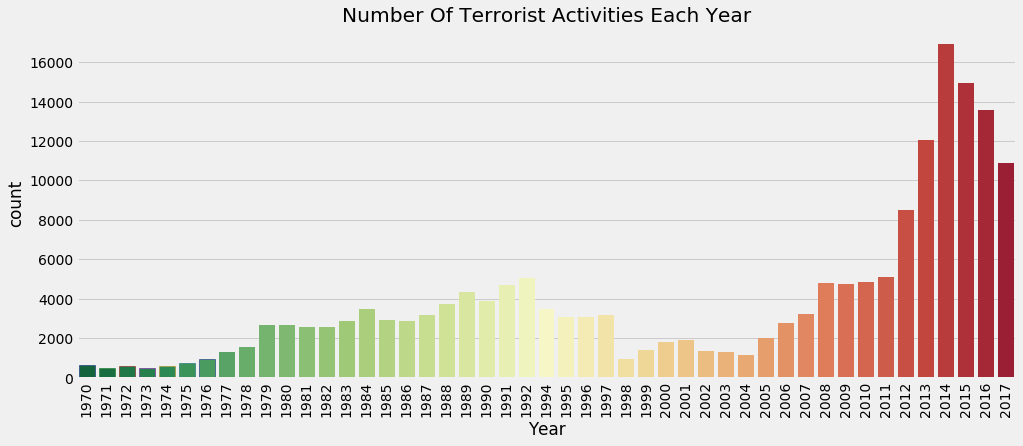

In [12]:
plt.subplots(figsize=(15,6))
sns.countplot('Year',data=terror,palette='RdYlGn_r',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

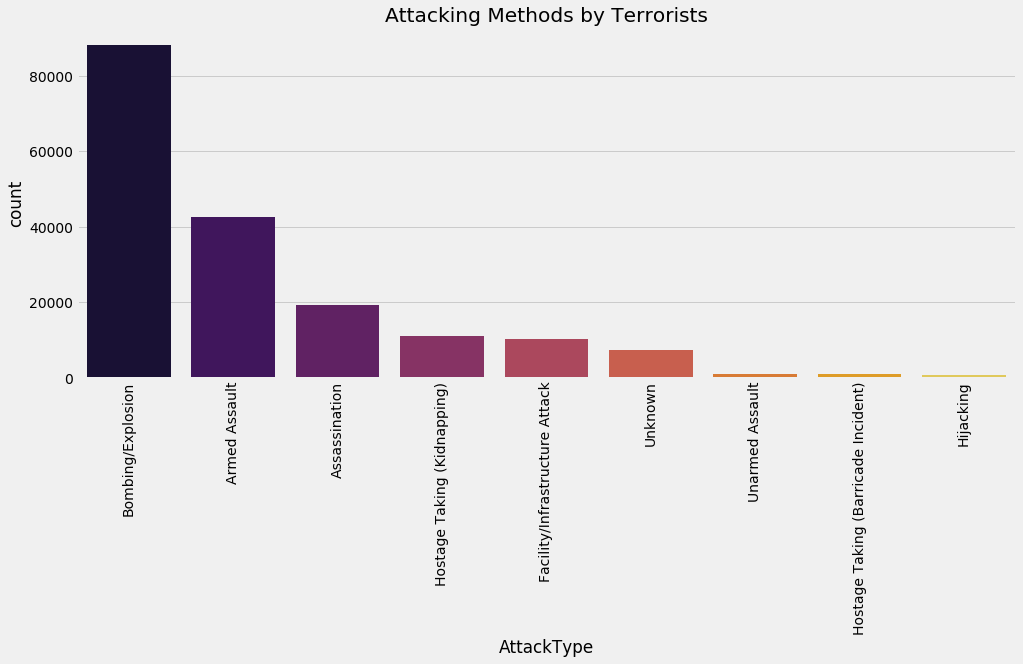

In [13]:
plt.subplots(figsize=(15,6))
sns.countplot('AttackType',data=terror,palette='inferno',order=terror['AttackType'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Attacking Methods by Terrorists')
plt.show()

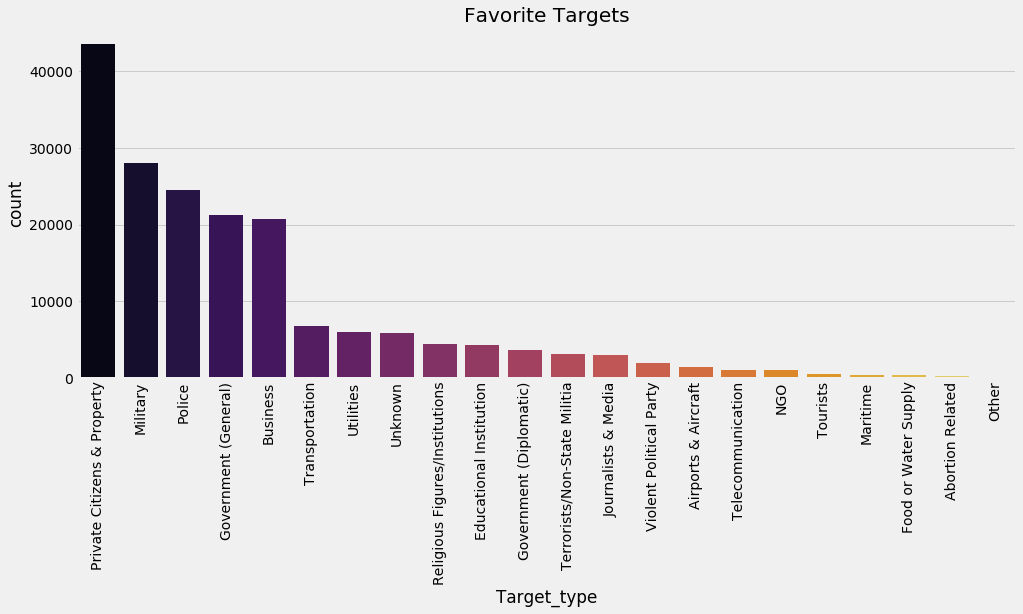

In [14]:
plt.subplots(figsize=(15,6))
sns.countplot(terror['Target_type'],palette='inferno',order=terror['Target_type'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Favorite Targets')
plt.show()



#  ----------------------------------Africa------------------------------------------------

In [22]:
GTD_Africa=GTD[GTD.region==11]

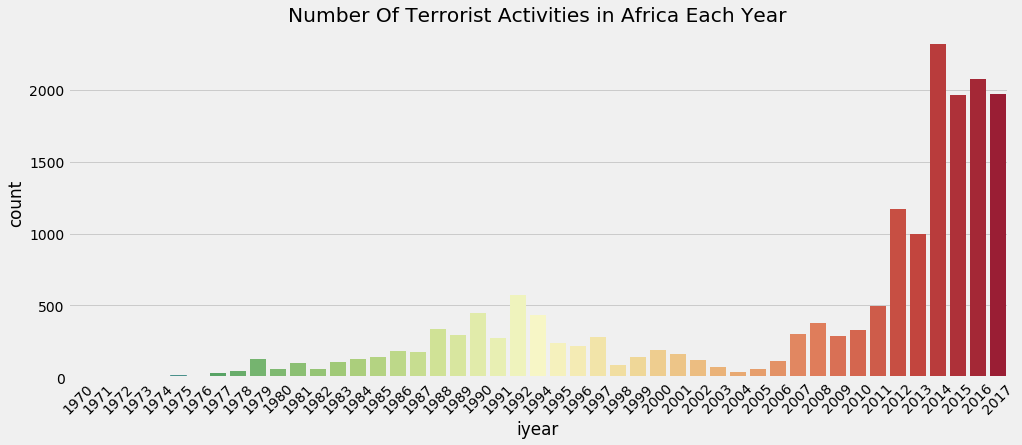

In [30]:
plt.subplots(figsize=(15,6))
sns.countplot('iyear',data=GTD_Africa,palette='RdYlGn_r',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=45)
plt.title('Number Of Terrorist Activities in Africa Each Year')
plt.show()

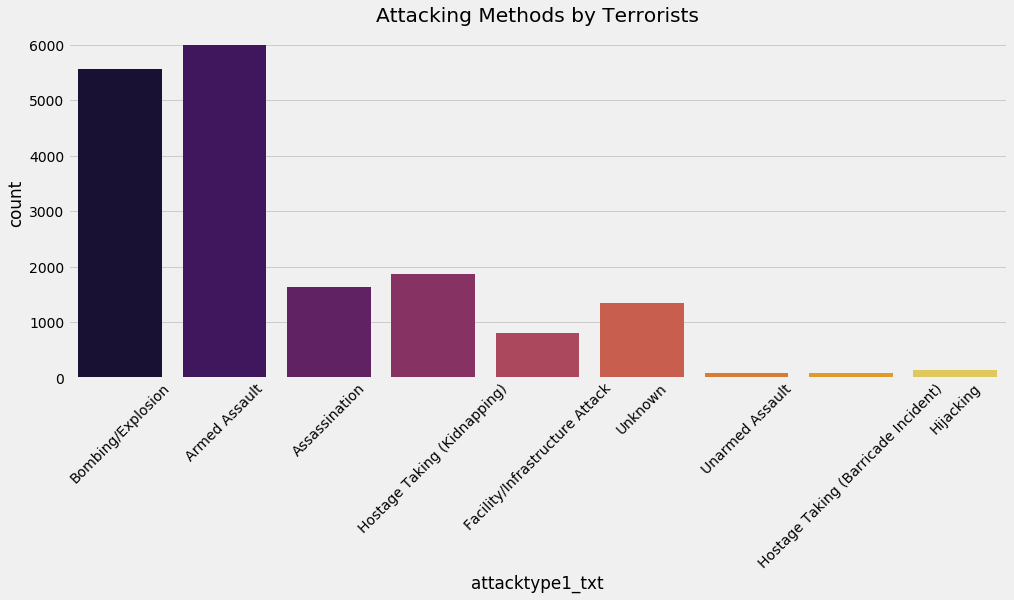

In [38]:
plt.subplots(figsize=(15,6))
sns.countplot('attacktype1_txt',data=GTD_Africa,palette='inferno',order=terror['AttackType'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Attacking Methods by Terrorists')
plt.show()

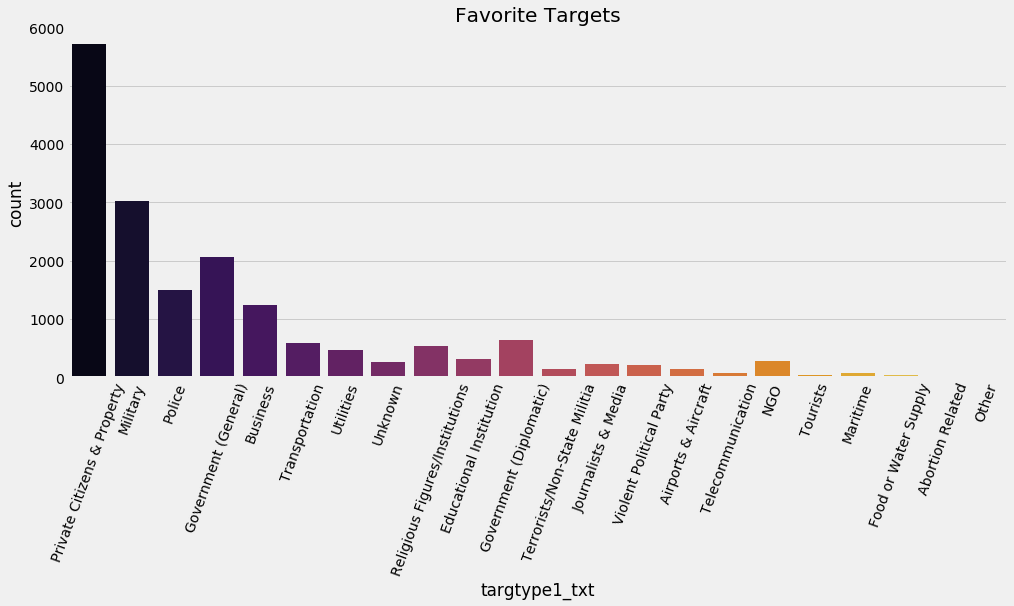

In [44]:
plt.subplots(figsize=(15,6))
sns.countplot(GTD_Africa['targtype1_txt'],palette='inferno',order=terror['Target_type'].value_counts().index)
plt.xticks(rotation=70)
plt.title('Favorite Targets')
plt.show()



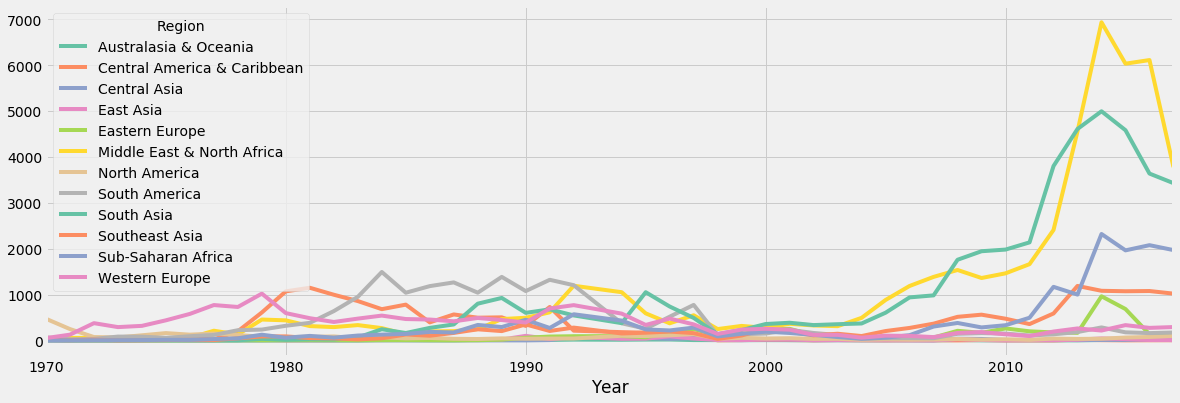

In [45]:
terror_region=pd.crosstab(terror.Year,terror.Region)
terror_region.plot(color=sns.color_palette('Set2',12))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

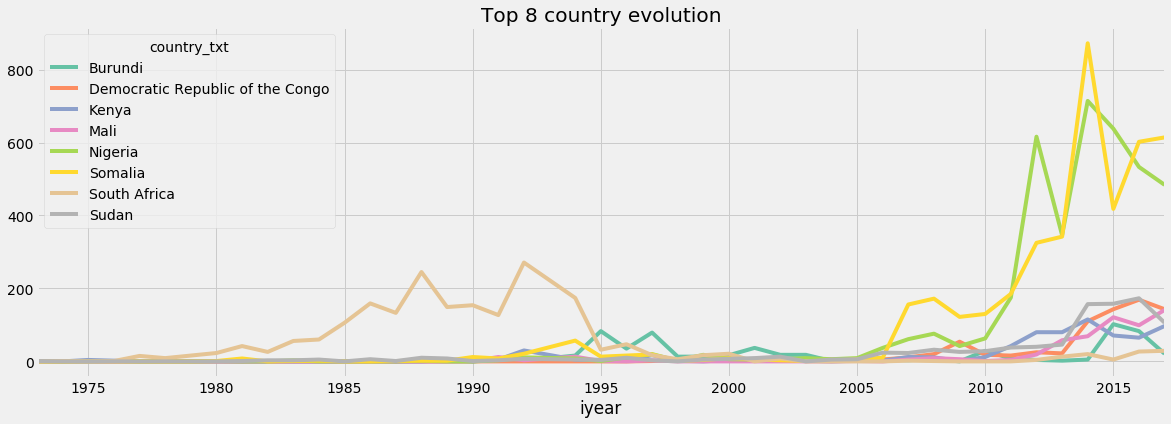

In [70]:
GTD_Africa_top8=GTD_Africa[GTD_Africa['country_txt'].isin(list(GTD_Africa['country_txt'].value_counts().index[0:8]))]
GTD_Africa_country=pd.crosstab(GTD_Africa_top8.iyear,GTD_Africa_top8.country_txt)
GTD_Africa_country.plot(color=sns.color_palette('Set2',12))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.title('Top 8 country evolution')
plt.show()


In [48]:
pd.crosstab(GTD_Africa.iyear,GTD_Africa.country_txt)

country_txt,Angola,Benin,Botswana,Burkina Faso,Burundi,Cameroon,Central African Republic,Chad,Comoros,Democratic Republic of the Congo,...,South Africa,South Sudan,Sudan,Swaziland,Tanzania,Togo,Uganda,Zaire,Zambia,Zimbabwe
iyear,,,,,,,,,,,,,,,,,,,,,
1970,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1971,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1972,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,0,0
1973,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
1974,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
1975,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1976,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1977,1,0,0,0,0,0,0,0,0,0,...,15,0,0,0,0,0,0,1,1,0
1978,2,0,0,0,0,0,0,0,0,0,...,9,0,0,0,0,0,0,0,3,0


In [59]:
GTD_Africa['country_txt'].value_counts().index[0:8]

Index(['Somalia', 'Nigeria', 'South Africa', 'Sudan',
       'Democratic Republic of the Congo', 'Kenya', 'Burundi', 'Mali'],
      dtype='object')

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
1772,197303010001,1973,3,1,NaN,1,3/3/1973,195,Sudan,11,...,NaN,NaN,NaN,NaN,State Department 1997 Document,1,1,1,1,NaN
2737,197412310001,1974,12,31,NaN,0,NaN,183,South Africa,11,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,0,-9,NaN
2778,197502000002,1975,2,0,NaN,0,NaN,104,Kenya,11,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
2853,197503010001,1975,3,1,NaN,0,NaN,104,Kenya,11,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
2895,197503250001,1975,3,25,NaN,1,3/30/1975,182,Somalia,11,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2949,197504110001,1975,4,11,NaN,0,NaN,104,Kenya,11,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
3078,197506130001,1975,6,13,NaN,0,NaN,104,Kenya,11,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,0,-9,NaN
3547,197601280004,1976,1,28,NaN,0,NaN,104,Kenya,11,...,NaN,NaN,NaN,NaN,PGIS,0,0,1,1,NaN
3594,197602130003,1976,2,13,NaN,0,NaN,147,Nigeria,11,...,"The victims included Sergeant Adamu Michika, S...","Segun Akande, ""42 years ago, one of Nigeria's ...","""Anniversary: Motoring Error that Led to the K...",NaN,UMD Miscellaneous,-9,-9,0,-9,NaN
4110,197609000001,1976,9,0,NaN,0,NaN,104,Kenya,11,...,NaN,NaN,NaN,NaN,PGIS,0,0,1,1,NaN


In [62]:
list(GTD_Africa['country_txt'].value_counts().index[0:8])

['Somalia',
 'Nigeria',
 'South Africa',
 'Sudan',
 'Democratic Republic of the Congo',
 'Kenya',
 'Burundi',
 'Mali']